In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [5]:
df = pd.read_csv('KNNAlgorithmDataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape, df.shape

((569, 33), (569, 33))

In [4]:
# df.isnull().sum()

## Data visulization

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

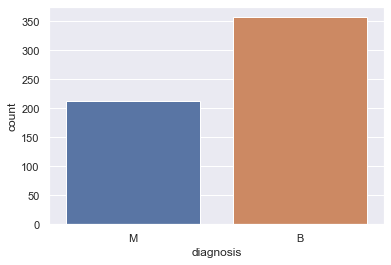

In [5]:
sns.set()
sns.countplot(data=df, x='diagnosis')

In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Split, train, test

In [7]:
X = df.drop(columns=['id', 'Unnamed: 32', 'diagnosis'], axis=1)
y = df['diagnosis']
X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Scale it --> will 

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#For X training set, we do fit_transform because we need to compute mean and std, and then use it to autoscale the data. 
#For X test set, well, we already have the mean and std, so we only do the transform part.

# Train-Test

In [9]:
knnModel = KNeighborsClassifier()

knnModel.fit(X_train, y_train)
xtrianPred = knnModel.predict(X_train)
xtrainAcc = accuracy_score(y_train, xtrianPred)
print(xtrainAcc)

xtestPred = knnModel.predict(X_test)
xtestAcc = accuracy_score(y_test, xtestPred)
print(xtestAcc)

0.9692307692307692
0.9824561403508771


In [10]:
confusion_matrix(y_test, xtestPred)

array([[73,  0],
       [ 2, 39]])

### I think the code below shows the acc and confusion_matrix

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xtestPred))


              precision    recall  f1-score   support

           B       0.97      1.00      0.99        73
           M       1.00      0.95      0.97        41

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

